# Bubble sort not optimized time complexity, and time complexity histograms for permutations of n different elements 

## Best case - Increasingly sorted array [1,2,...,n]

$$\frac{(n-1)n}{2}  = \frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$  \ \ \ \ \ \ \ \ \ \    0 \ \ \ \ \ \ \  \text{swaps}  \ \ \ \ $$ 

$$T_b(n) = \frac{n^2-n}{2} = \Theta(n^2) $$

## Worst case - decreasingly sorted array [n,n-1,...,1]

$$\frac{n^2-n}{2} \text{ comparisons}$$
$$ +$$
$$ \frac{n^2-n}{2} \ \ \ \ \text{swaps}\ \ \ \ \ \ \ $$ 

$$T_w(n) = n^2-n = \Theta(n^2) $$

## Average case over unifrom permutations of n different elements

$$\frac{n^2-n}{2} \ \ \ \text{constant comparisons - average is the same }$$
$$ +$$
$$ \frac{n^2-n}{4} \ \ \ \ \ \  \text{average swaps} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $$ 

$$T_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$



In [2]:
from itertools import permutations
 
n = 3
perm = permutations(range(1,n+1))

c = 0
# Print the obtained permutations
for i in perm:
    print(i)
    c += 1

print(c)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)
6


In [3]:
# https://www.geeksforgeeks.org/bubble-sort/ no optimized adding comaprisons, swaps, steps and passes counters, also fixing "for i in range(n-1):"

def bubbleSort(i):
  i = list(i)
  n = len(i)
  comps = 0
  swaps = 0
  steps = 0
  passes = 0
  swapped = True
  while swapped and n > 1:
    passes += 1
    swapped = False
    for j in range(1,n):
      comps += 1
      if i[j-1] > i[j]:
        aux = i[j-1]
        i[j-1] = i[j]
        i[j] = aux
        swaps += 1
        swapped = True
    n = n-1
  steps = comps + swaps
  return(comps,swaps,steps,passes)

In [4]:
def maxinversions(arr):
  maxinv = 0
  n = len(arr) 
  for i in range(n-1):
    inv = 0
    for j in range(i+1,n):
      if arr[j] < arr[i]:
        inv +=1
    if inv > maxinv:
      maxinv = inv
  return maxinv

n 6
number of permutations n! = 720



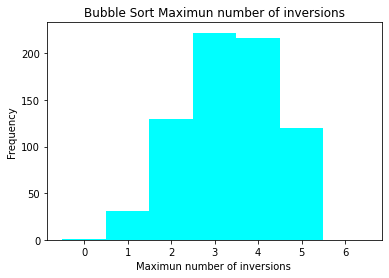

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 5
Maximun number of inversions formula max n-1 = 5
Maximun number of inversions exper mean = 3.3625
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 2.9300198761605345
Maximun number of inversions exper stdev = 1.0956907385044579



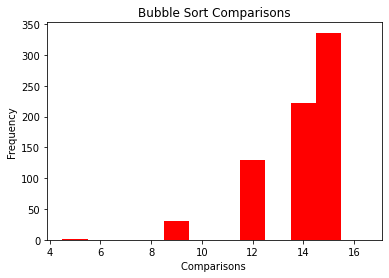

Comparisons
Comparisons formula (n-1)*n/2 = 15.0
Comparisons exper min = 5
Comparisonsexper max = 15
Comparisons exper mean = 13.877777777777778
Comparisons exper stdev = 1.5371530522927244



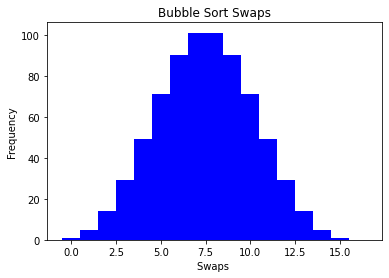

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 15
Swaps max formula (n-1)*n/2 = 15.0
Swaps exper mean = 7.5
Swaps mean formula (n-1)*n/4 = 7.5
Swaps exper stdev = 2.661453237111885



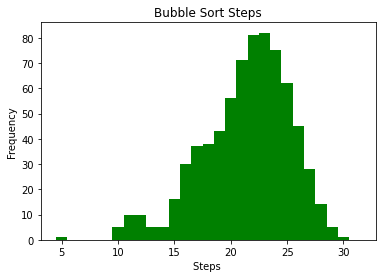

Steps
Steps exper min = 5
Steps min formula (n-1)*n/2 = 15.0
Steps exper max = 30
Steps max formula (n-1)*n = 30
Steps exper mean = 21.377777777777776
Steps mean formula (3/4)*(n**2-n) = 22.5
Steps exper stdev 3.8939490888008335



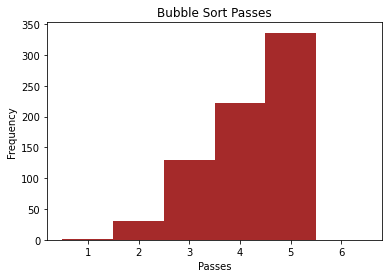

Passes
Passes formula (n-1) = 5
Passes exper min = 1
Passes exper max = 5
Passes exper mean = 4.195833333333334
Passes exper stdev 0.8908387901298417


In [22]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 6
perm = permutations(range(1,n+1))

comps = []
swaps = []
steps = []
passes = [] 
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSort(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)  
print("number of permutations n! =",math.factorial(n)) 
print()
   
b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions") 
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons") 
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps") 
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps") 
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()
    
print("Passes") 
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 6
number of permutations n! = 720



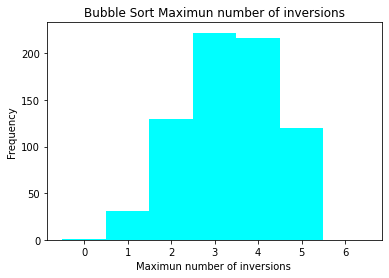

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 5
Maximun number of inversions formula max n-1 = 5
Maximun number of inversions exper mean = 3.3625
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 2.9300198761605345
Maximun number of inversions exper stdev = 1.0956907385044579



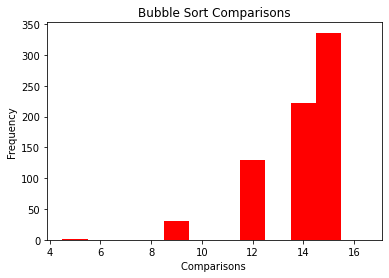

Comparisons
Comparisons formula (n-1)*n/2 = 15.0
Comparisons exper min = 5
Comparisonsexper max = 15
Comparisons exper mean = 13.877777777777778
Comparisons exper stdev = 1.5371530522927244



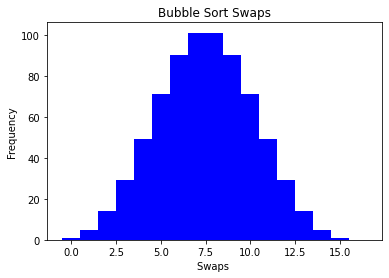

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 15
Swaps max formula (n-1)*n/2 = 15.0
Swaps exper mean = 7.5
Swaps mean formula (n-1)*n/4 = 7.5
Swaps exper stdev = 2.661453237111885



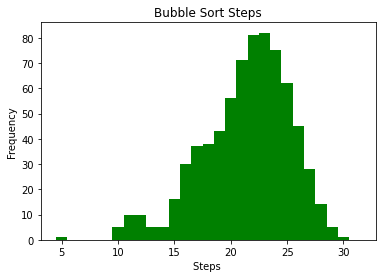

Steps
Steps exper min = 5
Steps min formula (n-1)*n/2 = 15.0
Steps exper max = 30
Steps max formula (n-1)*n = 30
Steps exper mean = 21.377777777777776
Steps mean formula (3/4)*(n**2-n) = 22.5
Steps exper stdev 3.8939490888008335



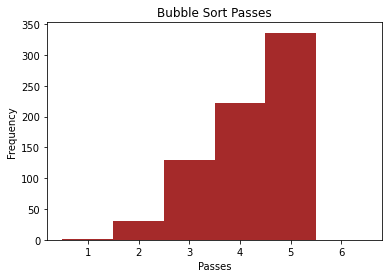

Passes
Passes formula (n-1) = 5
Passes exper min = 1
Passes exper max = 5
Passes exper mean = 4.195833333333334
Passes exper stdev 0.8908387901298417


In [20]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 6
perm = permutations(range(1,n+1))

comps = []
swaps = []
steps = []
passes = [] 
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSort(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)  
print("number of permutations n! =",math.factorial(n)) 
print()
   
b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions") 
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons") 
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps") 
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps") 
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()
    
print("Passes") 
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

n 6
number of permutations n! = 720



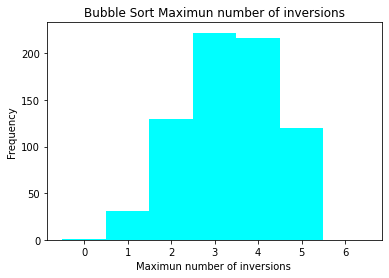

Maximun number of inversions
Maximun number of inversions exper min = 0
Maximun number of inversions formula min = 0
Maximun number of inversions exper max = 5
Maximun number of inversions formula max n-1 = 5
Maximun number of inversions exper mean = 3.3625
Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)= 2.9300198761605345
Maximun number of inversions exper stdev = 1.0956907385044579



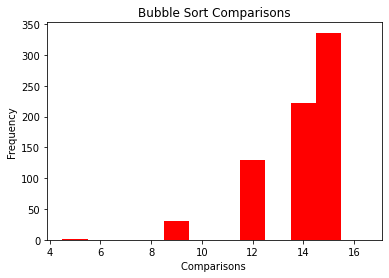

Comparisons
Comparisons formula (n-1)*n/2 = 15.0
Comparisons exper min = 5
Comparisonsexper max = 15
Comparisons exper mean = 13.877777777777778
Comparisons exper stdev = 1.5371530522927244



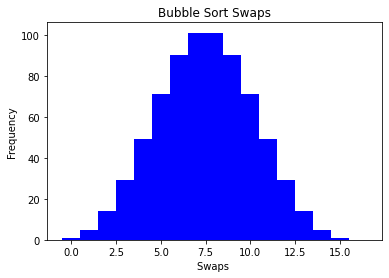

Swaps
Swaps exper min = 0
Swaps min formula = 0
Swaps exper max = 15
Swaps max formula (n-1)*n/2 = 15.0
Swaps exper mean = 7.5
Swaps mean formula (n-1)*n/4 = 7.5
Swaps exper stdev = 2.661453237111885



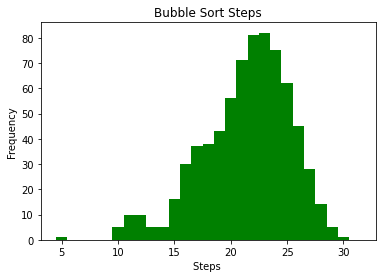

Steps
Steps exper min = 5
Steps min formula (n-1)*n/2 = 15.0
Steps exper max = 30
Steps max formula (n-1)*n = 30
Steps exper mean = 21.377777777777776
Steps mean formula (3/4)*(n**2-n) = 22.5
Steps exper stdev 3.8939490888008335



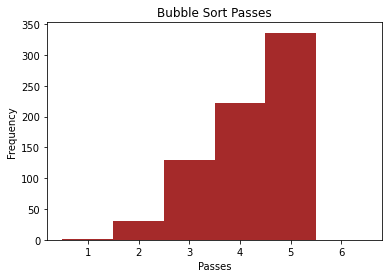

Passes
Passes formula (n-1) = 5
Passes exper min = 1
Passes exper max = 5
Passes exper mean = 4.195833333333334
Passes exper stdev 0.8908387901298417


In [19]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 6
perm = permutations(range(1,n+1))

comps = []
swaps = []
steps = []
passes = [] 
maxinvs = []

# Print the obtained permutations
for i in perm:
    i = list(i)
    maxinvs.append(maxinversions(i))
    c,sw,st,p = bubbleSort(i)
    comps.append(c)
    swaps.append(sw)
    steps.append(st)
    passes.append(p)

print("n",n)  
print("number of permutations n! =",math.factorial(n)) 
print()
   
b = np.array(range(min(maxinvs)-1,max(maxinvs)+2) ) +0.5
plt.hist(maxinvs,bins=b, color="cyan")
plt.title("Bubble Sort Maximun number of inversions")
plt.xlabel("Maximun number of inversions ")
plt.ylabel("Frequency")
plt.show()

print("Maximun number of inversions") 
print("Maximun number of inversions exper min =",min(maxinvs))
print("Maximun number of inversions formula min = 0")
print("Maximun number of inversions exper max =",max(maxinvs))
print("Maximun number of inversions formula max n-1 =",n-1)
print("Maximun number of inversions exper mean =",np.mean(maxinvs))
print("Maximun number of inversions formula mean  n- math.sqrt(math.pi*n/2)=",n- math.sqrt(math.pi*n/2))
print("Maximun number of inversions exper stdev =",np.std(maxinvs))
print()

b = np.array(range(min(comps)-1,max(comps)+2) ) +0.5
plt.hist(comps,bins=b, color="red")
plt.title("Bubble Sort Comparisons")
plt.xlabel("Comparisons ")
plt.ylabel("Frequency")
plt.show()

print("Comparisons") 
print("Comparisons formula (n-1)*n/2 =",(n-1)*n/2)
print("Comparisons exper min =",min(comps))
print("Comparisonsexper max =",max(comps))
print("Comparisons exper mean =",np.mean(comps))
print("Comparisons exper stdev =",np.std(comps))
print()

b = np.array(range(min(swaps)-1,max(swaps)+2) ) +0.5
plt.hist(swaps,bins=b,color="blue")
plt.title("Bubble Sort Swaps")
plt.xlabel("Swaps ")
plt.ylabel("Frequency")
plt.show()

print("Swaps") 
print("Swaps exper min =",min(swaps))
print("Swaps min formula = 0")
print("Swaps exper max =",max(swaps))
print("Swaps max formula (n-1)*n/2 =",(n-1)*n/2)
print("Swaps exper mean =",np.mean(swaps))
print("Swaps mean formula (n-1)*n/4 =",(n-1)*n/4)
print("Swaps exper stdev =",np.std(swaps))
print()

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps") 
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

b = np.array(range(min(passes)-1,max(passes)+2) ) +0.5
plt.hist(passes,bins=b,color="brown")
plt.title("Bubble Sort Passes")
plt.xlabel("Passes")
plt.ylabel("Frequency")
plt.show()
    
print("Passes") 
print("Passes formula (n-1) =",(n-1))
print("Passes exper min =",min(passes))
print("Passes exper max =",max(passes))
print("Passes exper mean =",np.mean(passes))
print("Passes exper stdev",np.std(passes))

In [14]:
# https://www.geeksforgeeks.org/bubble-sort/ no optimized adding only a steps counter, also fixing "for i in range(n-1):"

def bubbleSortSteps(i):
    steps = 0
    n = len(i)
    swapped = True
    while swapped and n > 1:
      swapped = False
      for j in range(1,n):
        steps += 1
        if i[j-1] > i[j]:
          aux = i[j-1]
          i[j-1] = i[j]
          i[j] = aux
          steps += 1
          swapped = True
      n = n-1         
    return(steps)

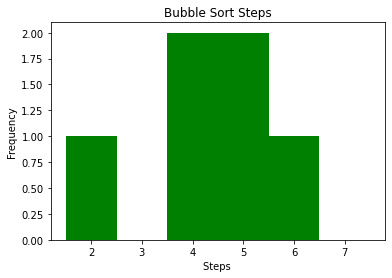

Steps
Steps exper min = 2
Steps min formula (n-1)*n/2 = 15.0
Steps exper max = 6
Steps max formula (n-1)*n = 30
Steps exper mean = 4.333333333333333
Steps mean formula (3/4)*(n**2-n) = 22.5
Steps exper stdev 1.247219128924647



In [18]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 6
perm = permutations(range(1,n+1))

times =  [] 

# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps") 
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

In [9]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 8
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps") 
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

NameError: ignored

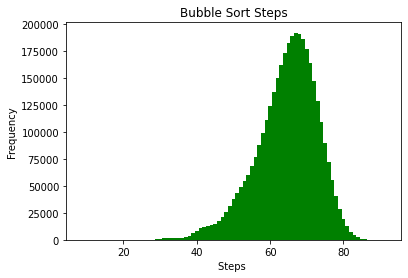

Steps
Steps exper min = 9
Steps min formula (n-1)*n/2 = 45.0
Steps exper max = 90
Steps max formula (n-1)*n = 90
Steps exper mean = 64.49318672839506
Steps mean formula (3/4)*(n**2-n) = 67.5
Steps exper stdev 8.352008300078836



In [ ]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 10
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in perm:
    i = list(i)
    times.append(bubbleSortSteps(i))

b = np.array(range(min(steps)-1,max(steps)+2) ) +0.5
plt.hist(steps,bins=b,color="green")
plt.title("Bubble Sort Steps")
plt.xlabel("Steps ")
plt.ylabel("Frequency")
plt.show()

print("Steps") 
print("Steps exper min =",min(steps))
print("Steps min formula (n-1)*n/2 =",(n-1)*n/2)
print("Steps exper max =",max(steps))
print("Steps max formula (n-1)*n =",(n-1)*n)
print("Steps exper mean =",np.mean(steps))
print("Steps mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("Steps exper stdev",np.std(steps))
print()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


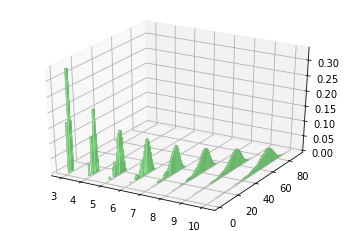

In [ ]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 10

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
   A = range(n)
   times = []

   for P in permutations(A):
       t = bubbleSortSteps(list(P)) 
       times.append(t)  
 
   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


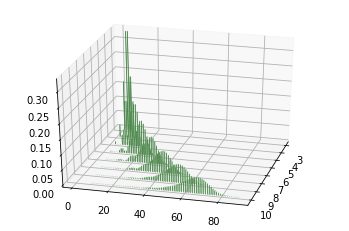

In [ ]:
# https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random 

fig = plt.figure()
ax = plt.axes(projection="3d")

N = 10

x = []
y = []
z = []
dx = []
dy = []
dz = []

for n in np.arange(3,N+1,1):
   A = range(n)
   times = []

   for P in permutations(A):
       t = bubbleSortSteps(list(P)) 
       times.append(t)  
 
   b = np.array(range(min(times)-1, max(times)+1))+0.5
   H = np.array(np.histogram(times,b))
   H[0] = H[0]/np.sum(H[0])
   for i in range(len(H[0])):
     x.append(n)
     y.append(H[1][i])
     z.append(0)
     dx.append(0.1)
     dy.append(0.1)
     dz.append(H[0][i])

ax.view_init(30, 15)
ax.bar3d(x, y, z, dx, dy, dz, color='palegreen', zsort='average')
plt.show()

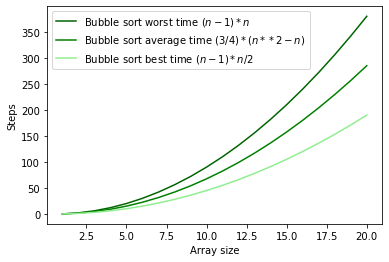

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,21,1)

plt.plot(n, (n-1)*n,  label = 'Bubble sort worst time $(n-1)*n$', color='darkgreen')
plt.plot(n, (3/4)*(n**2-n), label = 'Bubble sort average time $(3/4)*(n**2-n)$', color='green')
plt.plot(n, (n-1)*n/2, label = 'Bubble sort best time $(n-1)*n/2$',color='lightgreen')
plt.xlabel('Array size')
plt.ylabel('Steps')
plt.legend(loc = 'upper left')


# Average case - expected number of comparisons + swaps on random unifrom permtation of n diferent elements 

$$t_a(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $$

In [ ]:
# Average case on random unifrom permtation of  3/4 (n**2 -n)
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments 
t = np.array([4.5,9.0, 15.0,22.5]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data



,n,t
0,3.0,4.5
1,4.0,9.0
2,5.0,15.0
3,6.0,22.5


In [ ]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.  , -0.75,  0.75,  0.  ])